## Simple Linear Regression

Given a real estate dataset. 

The data is located in the file: 'real_estate_price_size.csv'. 

Create a simple linear regression, using the new data.

Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()

#Apply a fix to the statsmodels library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

from sklearn.linear_model import LinearRegression

Load the data

In [2]:
# We start by loading the data
data = pd.read_csv('real_estate_price_size.csv')

# Let's explore the top 5 rows of the df
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [3]:
data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


## Create the Regression
### Declare the dependent and the independent variables

In [4]:
x = data['size']
y = data['price']

### Explore the data

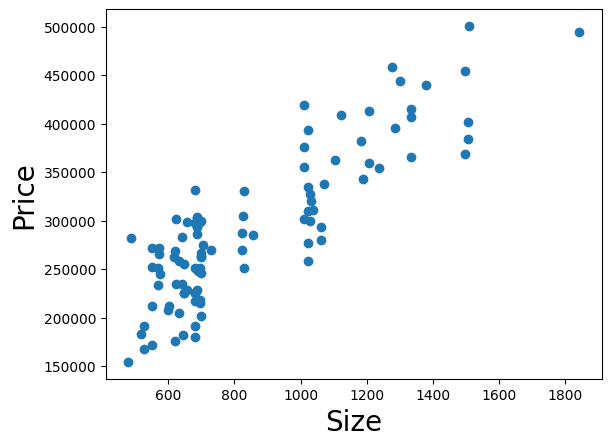

In [5]:
plt.scatter(x,y)
plt.xlabel('Size',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()

In [6]:
# In order to feed x to sklearn, it should be a 2D array (a matrix)
# Therefore, we must reshape it 
# Note that this will not be needed when we've got more than 1 feature (as the inputs will be a 2D array by default)

# x_matrix = x.values.reshape(100,1)
x_matrix = x.values.reshape(-1,1)

# Check the shape just in case
x_matrix.shape

(100, 1)

### Regression itself
Full documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [7]:
# Create a linear regression object
reg = LinearRegression()

# Fit the regression
# The first argument is the independent variable, while the second - the dependent
reg.fit(x_matrix,y)

LinearRegression()

## R-squared

In [8]:
# Get the R-squared
reg.score(x_matrix,y)

0.7447391865847587

## Coefficients

In [9]:
# Get the coefficients of the regression
# The output is an array
reg.coef_

array([223.17874259])

## Intercept

In [10]:
# Intercept of the regression
# The result is a float, expected a single value
reg.intercept_

101912.60180122912

### Making predictions

Apartment with a size of 750 sq.ft.

In [11]:
reg.predict([[750]])

array([269296.65874718])

In [12]:
new_size = pd.DataFrame(data=[750, 800],columns=['size'])

reg.predict(new_size)

c:\Users\Thiago Kato\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([269296.65874718, 280455.59587692])

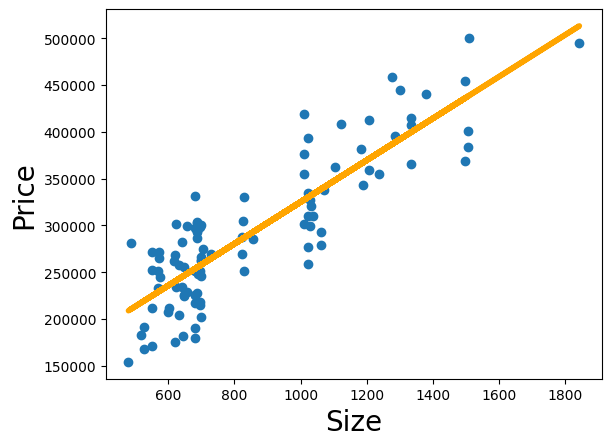

In [13]:
# Plot the regression line
plt.scatter(x,y)

# Parametrized version of the regression line
yhat = reg.coef_*x_matrix + reg.intercept_

# Non-parametrized version of the regression line
#yhat = 223.17874259*x + 101912.60180122912

fig = plt.plot(x,yhat, lw=4, c='orange', label ='regression line')

plt.xlabel('Size', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.show()